# Stack Overflow Annual Developer Survey - 2020 Survey Analysis

## Data Description
This survey reflects the opnion of opproximately 65,000 developers. The survey take account a veriety of professionals type. Here we have old/current professional devolopers, who program as hobby, partial devolopers who program a little in work and students who are learning to code. 

The sourvey was applied on February, before COvid-19 was declared Pademanic by the WHO (World Health Organization).

## What the community think about DevOps?
In this analysis, the DevOps movement was investigated using the opnion collected by StackOverFlow 2020 survey. It considers global and local point of view from professional and non professional developers. The raw data can be get from:

["Stack Overflow Annual Developer Survey"]:
<https://insights.stackoverflow.com/survey>
'title'

["Stack Overflow Annual Developer Survey"]


## Bussiness Understanding 
The following question were made to clarify the analysis flow. The null hyphotheses is presented above each question
```diff
* Question 0: What kind of developer are you?
- We can get the distribution of professional types, the most part are professionals.

* Question 1: What are people talking about DevOps?
- DevOps is responsible for a lot of software quality rasing and speed up the devoplopment time. So it is expected to be really importante.

* Question 2: What are professional developers talking about DevOps?
- The professional users considers the DevOps as the main importante, because of its advanteges. 

* Question 3: What are USA professional developers talking about DevOps?
- As we have a lot of north american professionals on our dataset and in the industry, it expected that they considers DevOps as a great methodology/techology to build 
IT infrastruture.

## Data Understanding Process
This saction is applyied to get the general information about the data, after that **Data Preparation** and **Evaluation** are performed. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 0.0 Data Collection Process

In [17]:
# import data and scheme data
df = pd.read_csv("survey_results_public.csv")
df_scheme = pd.read_csv("survey_results_schema.csv")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## 1.0 Data Understanding Process

In [19]:
# Get Entire data information
df_scheme.to_dict()

{'Column': {0: 'Respondent',
  1: 'MainBranch',
  2: 'Hobbyist',
  3: 'Age',
  4: 'Age1stCode',
  5: 'CompFreq',
  6: 'CompTotal',
  7: 'ConvertedComp',
  8: 'Country',
  9: 'CurrencyDesc',
  10: 'CurrencySymbol',
  11: 'DatabaseDesireNextYear',
  12: 'DatabaseWorkedWith',
  13: 'DevType',
  14: 'EdLevel',
  15: 'Employment',
  16: 'Ethnicity',
  17: 'Gender',
  18: 'JobFactors',
  19: 'JobSat',
  20: 'JobSeek',
  21: 'LanguageDesireNextYear',
  22: 'LanguageWorkedWith',
  23: 'MiscTechDesireNextYear',
  24: 'MiscTechWorkedWith',
  25: 'NEWCollabToolsDesireNextYear',
  26: 'NEWCollabToolsWorkedWith',
  27: 'NEWDevOps',
  28: 'NEWDevOpsImpt',
  29: 'NEWEdImpt',
  30: 'NEWJobHunt',
  31: 'NEWJobHuntResearch',
  32: 'NEWLearn',
  33: 'NEWOffTopic',
  34: 'NEWOnboardGood',
  35: 'NEWOtherComms',
  36: 'NEWOvertime',
  37: 'NEWPurchaseResearch',
  38: 'NEWPurpleLink',
  39: 'NEWSOSites',
  40: 'NEWStuck',
  41: 'OpSys',
  42: 'OrgSize',
  43: 'PlatformDesireNextYear',
  44: 'PlatformWorkedW

In [20]:
# Adding data to tranforme 
str(df_scheme.loc[df_scheme['Column']=='NEWDevOps']['QuestionText'].values[0])

'Does your company have a dedicated DevOps person?'

In [21]:
df = pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [22]:
df.shape

(64461, 61)

## 2.0 Data Preparation & Evaluation 
This section proformes **Data Preparation** and **Evaluation** for each Business question formulated early. 

<div>
<h2 style="color:green"> Question 0: What kind of developer are you? </h2>
<p>It necessary to evaluate the qualification from the people interviewed.  Some question are:</p>

</dvi>

<ol>

<li>
Are the people interested on the stackoverflow qualified? 
</li>

<li>
How much experience do they have?
</li>

</ol>


<AxesSubplot:title={'center':'What type of developer is answering?'}, ylabel='MainBranch'>

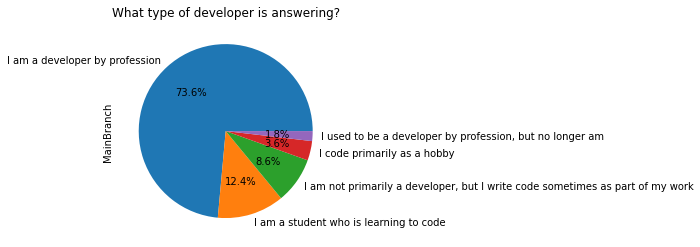

In [23]:
# Question 0: What kind of developer you are?

MainBranch_data = df['MainBranch'].value_counts()

#(MainBranch_data/df.shape[0]).plot(kind='pie',autopct='%1.1f%%')
MainBranch_data.plot(kind='pie',autopct='%1.1f%%',normalize=True, title = 'What type of developer is answering?')



<div>
<h2 style="color:green"> Question 1: What are people talking about DevOps? </h2>
<p>Maybe DevOps is not important for everyone, so it is good verify this aspect. </p>
</dvi>




<AxesSubplot:title={'center':'DevOps Importance to Prof. Developers'}, ylabel='NEWDevOpsImpt'>

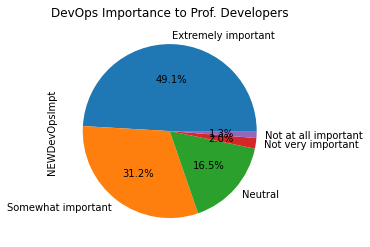

In [24]:
# Question 1 What professonal Developers think about DevOps Importance?
MainBranch_Prof_DevOpsImpor = df.loc[df['MainBranch']=='I am a developer by profession']['NEWDevOpsImpt'].value_counts()
MainBranch_Prof_DevOpsImpor.plot(kind='pie',
                                normalize=True, 
                                autopct='%1.1f%%',
                                title='DevOps Importance to Prof. Developers')

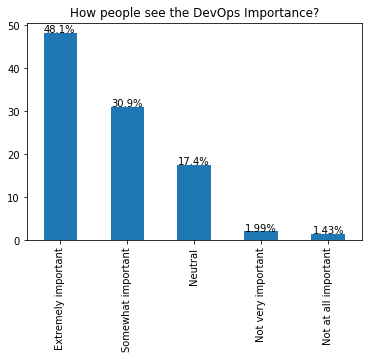

In [25]:

# Question 1 : How the total people asked see the DevOps Impostance
df_good = df[df['NEWDevOpsImpt'].isnull() == False]
df_good['NEWDevOpsImpt'].value_counts()/df_good.shape[0]
axes = (df_good['NEWDevOpsImpt'].value_counts()/df_good.shape[0]*100).plot(kind='bar',title='How people see the DevOps Importance?')

for p in axes.patches:
    axes.annotate('{0:.4}%'.format(str(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))



<div>
<h2 style="color:green">Question 2: What are professional developers talking about DevOps?</h2>
<p>Looking through the professional developers opinions, it makes us certain about the DevOps importance and results on daily work. So what about the importance only for professional developers.</p>
</dvi>



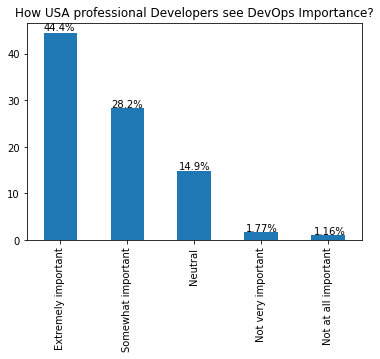

In [43]:
# Question 2 : How the professional developers see DevOps Importance?

df_good = df[df['NEWDevOpsImpt'].isnull() == False]
df_us_ = df_good
df_us_prof = df_us_[df_us_['MainBranch']=='I am a developer by profession']
df_us_val = df_us_prof['NEWDevOpsImpt'].value_counts()


axes = (df_us_val/df_good.shape[0]*100).plot(kind='bar',title='How USA professional Developers see DevOps Importance?')
for p in axes.patches:
    axes.annotate('{0:.4}%'.format(str(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))



#df_us_val/df_us_val.shape[0]


<div>
<h2 style="color:green">Question 3: What are USA professional developers talking about DevOps?</h2>
<p>Talking about the technology, USA professional developers have a large impact on survey numbers. So here relationship between the developers origin and DevOps is investigated.</p>
</dvi>



Extremely important     896.4
Somewhat important      449.0
Neutral                 247.6
Not very important       25.6
Not at all important     18.8
Name: NEWDevOpsImpt, dtype: float64

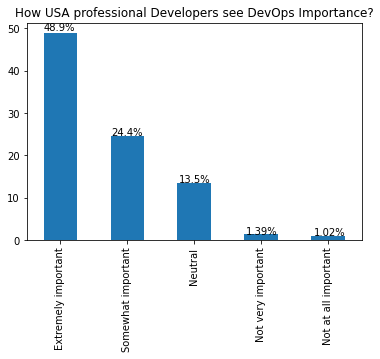

In [35]:
# Question 3 : How the people from USA see DevOps Importance?

df_good = df[df['NEWDevOpsImpt'].isnull() == False]
df_us_ = df_good[df_good['Country']=='United States']
df_us_prof = df_us_[df_us_['MainBranch']=='I am a developer by profession']
df_us_val = df_us_prof['NEWDevOpsImpt'].value_counts()


axes = (df_us_val/df_good[df_good['Country']=='United States'].shape[0]*100).plot(kind='bar',title='How USA professional Developers see DevOps Importance?')
for p in axes.patches:
    axes.annotate('{0:.4}%'.format(str(p.get_height())), (p.get_x() * 1.01, p.get_height() * 1.01))

df_us_val/df_us_val.shape[0]

## Conclusion
0. The professional developers are really involved with the StackOverFlow survey. It means they represent the most part of people interviewed.
1. It a general option that the DevOps is gain a lot of importance for all kind of developers.
2. To professional developers, Devops is extremely important to software development. 
3. The USA professional developers see DevOps extremely important as all other developers outside USA.